In [ ]:

import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train_processed, X_test_processed, y_train, y_test = joblib.load("train_test_processed.pkl")



In [33]:
# Inicijalizacija i treniranje modela Logicka regresija
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_processed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
y_pred_log = log_reg.predict(X_test_processed)


Accuracy (Logistic Regression): 0.875

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184


ROC AUC Score: 0.8717120994739359


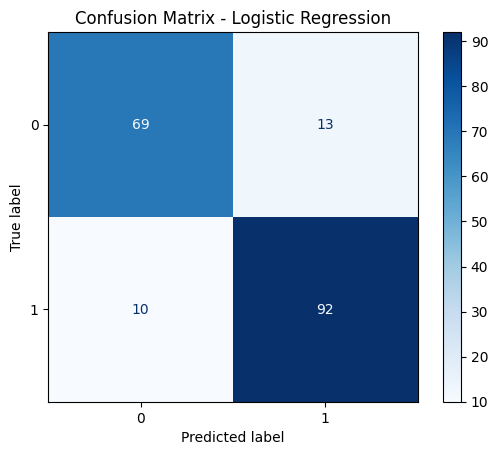

In [35]:
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_log))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test_processed, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()

In [ ]:
from sklearn.svm import SVC

# Inicijalizacija SVM modela
svm_model = SVC(probability=True, random_state=42)

# Treniranje modela
svm_model.fit(X_train_processed, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Accuracy (SVM): 0.8641304347826086

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        82
           1       0.87      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC AUC Score: 0.9345408895265424


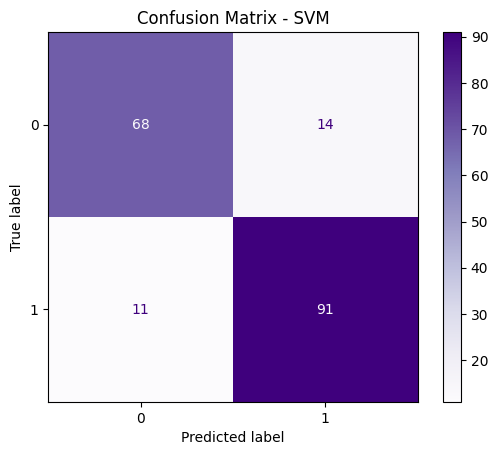

In [ ]:
# Predikcija
y_pred_svm = svm_model.predict(X_test_processed)

# Evaluacija
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test_processed)[:, 1]))

# Vizualizacija matrice
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_processed, y_test, cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.grid(False)
plt.show()


In [40]:
#Inicijalizacija Random Forest modela
rf_model = RandomForestClassifier(random_state=42)

In [41]:
# Treniranje modela i predikcija
rf_model.fit(X_train_processed, y_train)

y_pred_rf = rf_model.predict(X_test_processed)

In [42]:
# Evaluacija
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_processed)[:, 1]))


Accuracy (Random Forest): 0.8586956521739131

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC AUC Score: 0.9271879483500717


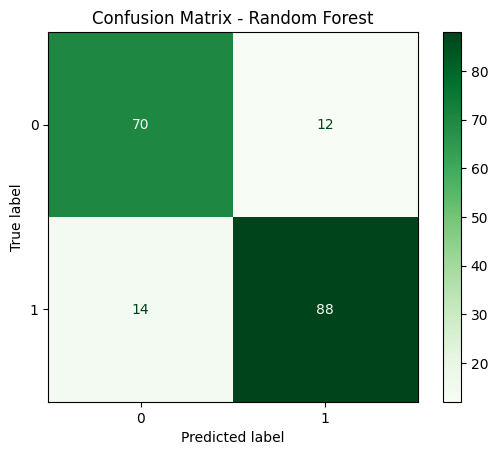

In [43]:
# Vizualizacija matrice konfuzije
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_processed, y_test, cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

In [44]:
import joblib

joblib.dump(svm_model, "svm_model.pkl")

['svm_model.pkl']